In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import pickle
from pprint import pprint
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc


%matplotlib inline

In [3]:
jun_dropouts = pd.read_csv('data/11th_grade_dropouts.csv', index_col='sid')

In [4]:
jun_dropouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52933 entries, 2 to 111990
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dropout              52933 non-null  int64  
 1   male                 52933 non-null  float64
 2   race_num             52933 non-null  int64  
 3   math_ss              52933 non-null  float64
 4   read_ss              52933 non-null  float64
 5   scale_score_11_math  52933 non-null  float64
 6   scale_score_11_read  52933 non-null  float64
 7   gifted               52933 non-null  int64  
 8   ever_alternative     52933 non-null  int64  
 9   iep                  52933 non-null  int64  
 10  pct_days_absent      52933 non-null  float64
 11  gpa                  52933 non-null  float64
 12  frpl                 52933 non-null  float64
 13  ell                  52933 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 6.1 MB


OK, let's train/test/split our data

In [5]:
X = jun_dropouts.copy()

In [6]:
y = X.pop('dropout')
y

sid
2         0
5         0
12        1
13        0
14        0
         ..
111984    0
111985    0
111986    0
111988    1
111990    0
Name: dropout, Length: 52933, dtype: int64

In [7]:
X

,male,race_num,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
sid,,,,,,,,,,,,,
2,0.0,0,-1.0,-1.0,18.0,19.0,0,1,0,10.664031,1.230000,1.0,0
5,0.0,0,18.0,46.0,16.0,18.0,0,0,0,0.969005,2.822795,1.0,0
12,0.0,0,18.0,35.0,-1.0,-1.0,0,1,0,4.746706,0.330000,0.0,0
13,0.0,0,48.0,80.0,23.0,27.0,0,0,1,6.850071,2.985000,1.0,0
14,1.0,0,18.0,30.0,16.0,14.0,0,0,0,5.802631,2.118500,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111984,1.0,1,34.0,44.0,16.0,15.0,0,1,1,9.833898,2.079800,1.0,0
111985,0.0,0,23.0,51.0,16.0,20.0,1,1,0,2.291429,3.443500,0.0,0
111986,1.0,0,4.0,18.0,15.0,8.0,0,0,1,7.766962,1.695142,1.0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
best_rf = pd.read_pickle('data/rf_random_cv.pkl')

In [12]:
best_rf

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=500),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [16]:
best_rf.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [17]:
rf = RandomForestClassifier(n_estimators=1600,
 min_samples_split=5,
 min_samples_leaf=1,
 max_features='auto',
 max_depth=10,
 bootstrap=True)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=1600)

In [18]:
jun_y_pred = rf.predict(X_test)
rf.score(X_test,y_test)

0.9079345088161209

In [22]:
cm_rf = confusion_matrix(y_test,jun_y_pred)
cm_rf

array([[12211,   678],
       [  784,  2207]])

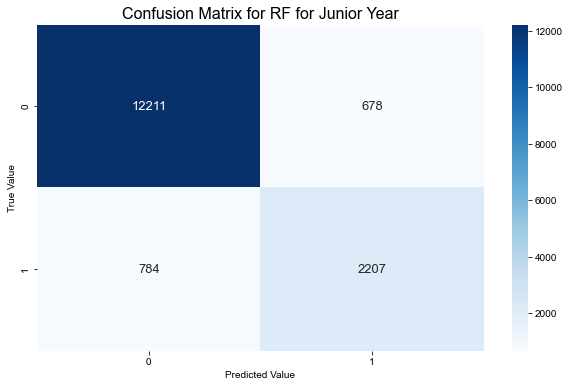

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, fmt = "g",cmap = "Blues",annot_kws={"size": 13})
sns.set(font_scale=1.2) # for label size
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for RF for Junior Year', fontsize = 16)
plt.savefig('confusion-matrix-rf-junior-year.png')

In [25]:
score = classification_report(y_test,jun_y_pred, target_names = ['Not Dropout', 'Dropout'])
print(score)

              precision    recall  f1-score   support

 Not Dropout       0.94      0.95      0.94     12889
     Dropout       0.76      0.74      0.75      2991

    accuracy                           0.91     15880
   macro avg       0.85      0.84      0.85     15880
weighted avg       0.91      0.91      0.91     15880



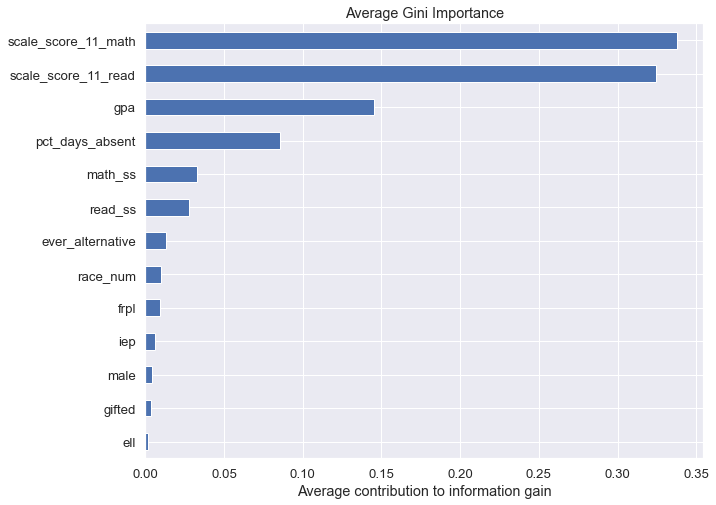

In [26]:
# Plot the feature importance
feat_scores = pd.Series(rf.feature_importances_,
                           index=X.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

Number of features for 95% importance: 11


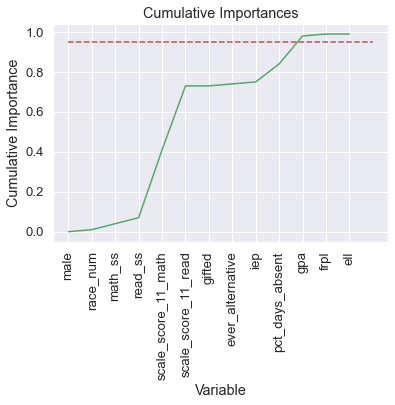

In [27]:
# Get numerical feature importances
importances = list(rf.feature_importances_)# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importances)]

# List of features sorted from most to least important
x_values = list(range(len(importances)))
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');


# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

In [ ]:
X_5 = X[['gpa', 'pct_days_absent']]
X_5

In [31]:
threshold = [0, 0.10, 0.25, 0.50, 0.75, 1]

predicted = rf.predict_proba(X_test)
predicted

array([[0.92813717, 0.07186283],
       [0.80304561, 0.19695439],
       [0.30474343, 0.69525657],
       ...,
       [0.97004901, 0.02995099],
       [0.3246876 , 0.6753124 ],
       [0.96756734, 0.03243266]])

In [32]:
predicted[:,1] #predicted probability that this student will dropout

array([0.07186283, 0.19695439, 0.69525657, ..., 0.02995099, 0.6753124 ,
       0.03243266])

In [33]:
proba_dropouts = predicted[:,1] 
proba_dropouts > threshold[1]

array([False,  True,  True, ..., False,  True, False])

In [34]:
for i in range(len(threshold)):
    y_pred_thresh = (predicted[:,1] >= threshold[i]).astype('int')


    thresh_scores = classification_report(y_test,y_pred_thresh, target_names = ['Not Dropout', 'Dropout'])
    #print(round(accuracy,4,)*100, "%")
    print('Threshold value:', threshold[i])
    print(thresh_scores)

Threshold value: 0
              precision    recall  f1-score   support

 Not Dropout       0.00      0.00      0.00     12889
     Dropout       0.19      1.00      0.32      2991

    accuracy                           0.19     15880
   macro avg       0.09      0.50      0.16     15880
weighted avg       0.04      0.19      0.06     15880

Threshold value: 0.1
              precision    recall  f1-score   support

 Not Dropout       0.97      0.82      0.89     12889
     Dropout       0.54      0.88      0.67      2991

    accuracy                           0.83     15880
   macro avg       0.75      0.85      0.78     15880
weighted avg       0.89      0.83      0.85     15880

Threshold value: 0.25
              precision    recall  f1-score   support

 Not Dropout       0.96      0.92      0.94     12889
     Dropout       0.69      0.82      0.75      2991

    accuracy                           0.90     15880
   macro avg       0.82      0.87      0.84     15880
weighted avg

/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LOOK AT THAT RECALL FOR THRESHOLD 25%!!!!! 

In [35]:
proba_dropouts

array([0.07186283, 0.19695439, 0.69525657, ..., 0.02995099, 0.6753124 ,
       0.03243266])

In [38]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, proba_dropouts)

In [39]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Optimized Random Forest: ROC AUC=%.3f' % (rf_auc))

No Skill: ROC AUC=0.500
Optimized Random Forest: ROC AUC=0.921


In [40]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
best_rf_fpr, best_rf_tpr, thresholds = roc_curve(y_test, proba_dropouts)

In [41]:
optimal_idx = np.argmax(best_rf_tpr - best_rf_fpr)
optimal_threshold = thresholds[optimal_idx]

In [42]:
optimal_threshold #this would capture the most true dropouts (which is much higher than the 3% from original model)

0.21513622549054323

In [44]:
best_rf_fpr[optimal_idx]

0.0931802312049034

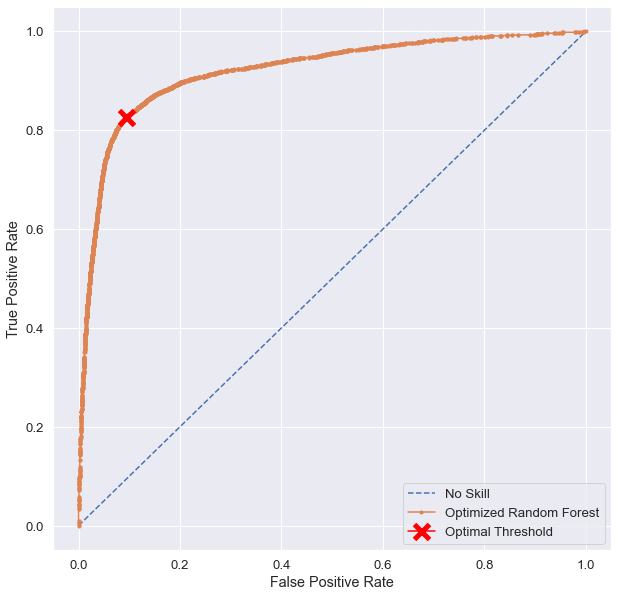

In [45]:
plt.figure(figsize=(10,10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(best_rf_fpr, best_rf_tpr, marker='.', label='Optimized Random Forest')
plt.plot(best_rf_fpr[optimal_idx], best_rf_tpr[optimal_idx], marker='x', markersize=15, mew=5, c='red', label='Optimal Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

In [46]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, proba_dropouts)
auc = auc(recall, precision)

In [47]:
best_rf_precision, best_rf_recall, _ = precision_recall_curve(y_test, proba_dropouts)
#best_rf_f1, best_rf_auc = f1_score(y_test, best_rf_y_pred), auc(best_rf_recall, best_rf_precision)

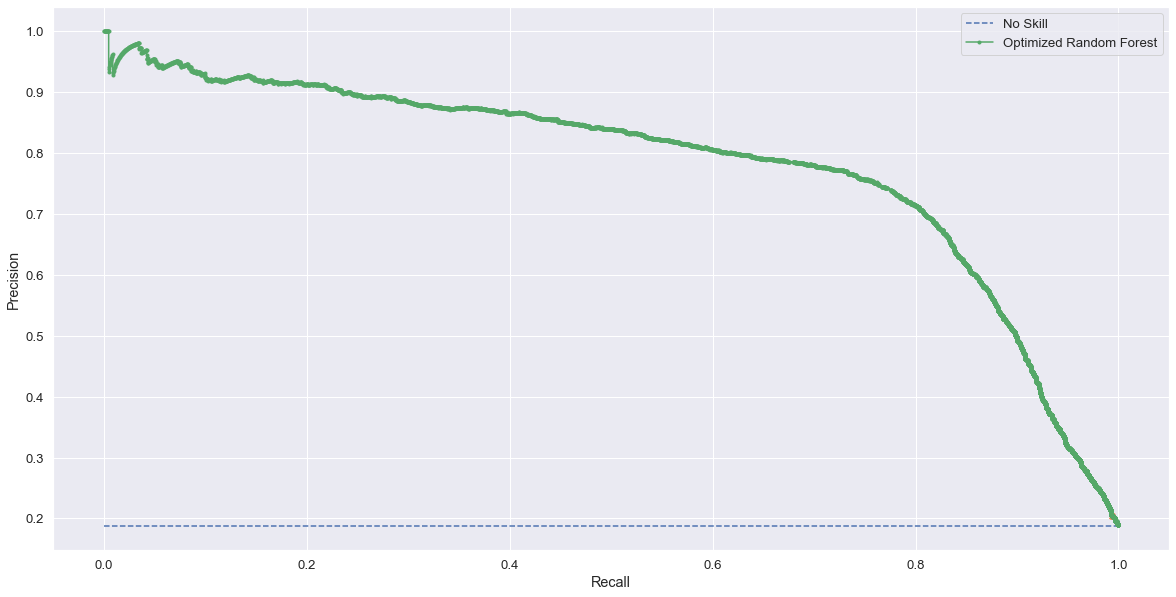

In [48]:
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(20,10))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(best_rf_recall[optimal_idx], best_rf_precision[optimal_idx], marker='X')
plt.plot(best_rf_recall, best_rf_precision, marker='.', label='Optimized Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

So maybe waiting is better.... But let's also consider urbanicity!

In [49]:
#Ok, let's do one final thing: just 2 x cols, optimized rf, threshold of .75
X_2 = X[['pct_days_absent', 'gpa']]
X_2

,pct_days_absent,gpa
sid,,
2,10.664031,1.230000
5,0.969005,2.822795
12,4.746706,0.330000
13,6.850071,2.985000
14,5.802631,2.118500
...,...,...
111984,9.833898,2.079800
111985,2.291429,3.443500
111986,7.766962,1.695142


In [50]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y, test_size=0.3, random_state=1234)

In [51]:
rf.fit(X2_train, y2_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=1600)

In [52]:
gpa_y_pred = rf.predict(X2_test)
rf.score(X2_test,y2_test)

0.8613979848866499

In [53]:
cm_rf = confusion_matrix(y2_test, gpa_y_pred)
cm_rf

array([[12440,   502],
       [ 1699,  1239]])

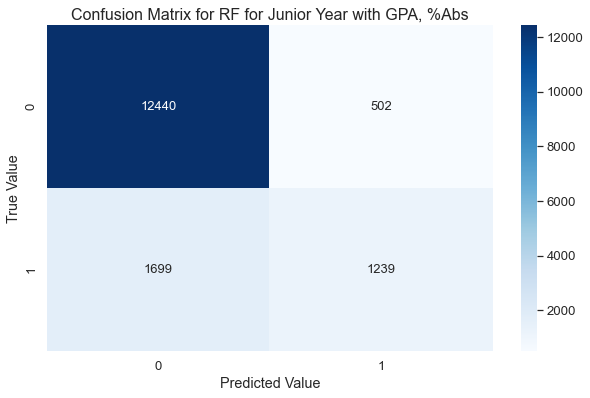

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, fmt = "g",cmap = "Blues",annot_kws={"size": 13})
sns.set(font_scale=1.2) # for label size
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for RF for Junior Year with GPA, %Abs', fontsize = 16)
plt.savefig('confusion-matrix-rf-junior-year-gpa-pct.png')

In [55]:
score = classification_report(y2_test, gpa_y_pred, target_names = ['Not Dropout', 'Dropout'])
print(score)

              precision    recall  f1-score   support

 Not Dropout       0.88      0.96      0.92     12942
     Dropout       0.71      0.42      0.53      2938

    accuracy                           0.86     15880
   macro avg       0.80      0.69      0.72     15880
weighted avg       0.85      0.86      0.85     15880



In [56]:
#Note we sacrifice a lot of recall by only looking at gpa and pct days absent